In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import lightgbm as lgb

In [ ]:
data=pd.read_excel('Cluster_Data_HDBSCAN.xlsx',sheet_name=11,header=None)
data.shape

(339, 43)

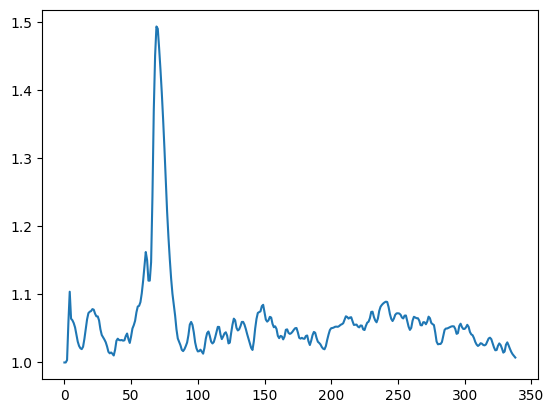

In [ ]:
col=20
col_data=data.iloc[:,col]
col_data.index=[i for i in range(0,len(col_data))]
col_data.plot()
col_data=np.array(col_data)

In [ ]:
def split_sequence(sequence, window_size):
    X = []
    y = []
    for i in range(len(sequence)):
        end_idx = i + window_size
        if end_idx > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
train=col_data[:-int(len(col_data)*0.2)]
test=col_data[-int(len(col_data)*0.2):]
x_train,y_train=split_sequence(train,window_size=3)
x_test,y_test=split_sequence(test,window_size=3)

Using XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

In [ ]:
xgb_model=XGBRegressor(**best_params)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgb_model.predict(x_test)

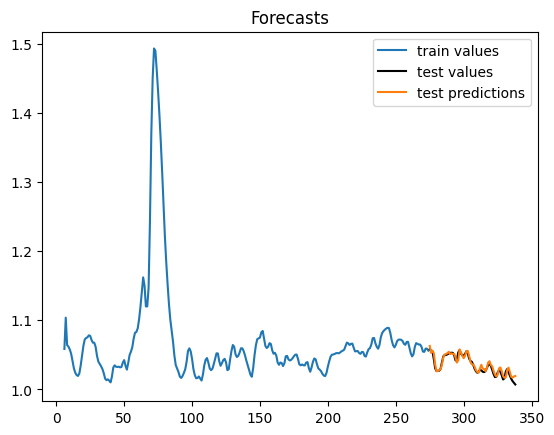

In [ ]:
plt.plot(pd.Series(y_train,index=[i for i in range(6,275)]), label='train values')
plt.plot(pd.Series(y_test,index=[i for i in range(275,339)]), label='test values',color='black')
plt.plot(pd.Series(y_pred,index=[i for i in range(275,339)]), label='test predictions')
plt.title('Forecasts')
plt.legend()

In [ ]:
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
print(f'rmse: {rmse}')

rmse: 0.0042399890745604156


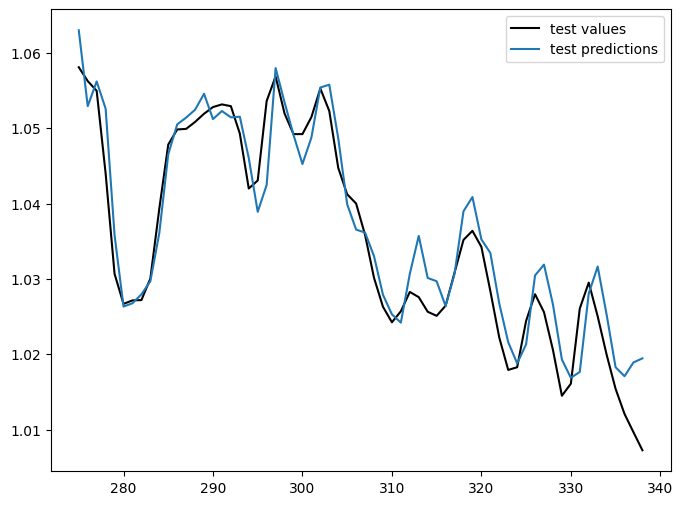

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(pd.Series(y_test,index=[i for i in range(275,339)]), label='test values',color='black')
plt.plot(pd.Series(y_pred,index=[i for i in range(275,339)]), label='test predictions')
plt.legend()

In [ ]:
new_data = np.array([col_data[336],col_data[337],col_data[338]])
new_data = new_data.reshape(1,-1)
forecast= xgb_model.predict(new_data)

In [ ]:
print(f'Predicted future value: {forecast[0]}')

Predicted future value: 1.0269640684127808


USING LightGBM